#                       ***GRIP - THE SPARKS FOUNDATION***
#                       **Data Science And Business Analytics Internship**



> ### **Task : Predict the percentage of a student based on the no. of study hours.**

> ### **Author : Chetan Urkudkar**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline
print("Libraries imported successfully")


Libraries imported successfully


##**Reading the data**

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data Imported Successfully")

Data Imported Successfully


##**Data Exploration**

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
data.isnull().sum() #checking if there is any null value

Hours     0
Scores    0
dtype: int64

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.corr() #checking the correlation  between hours and scores

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## **Data Visualization**

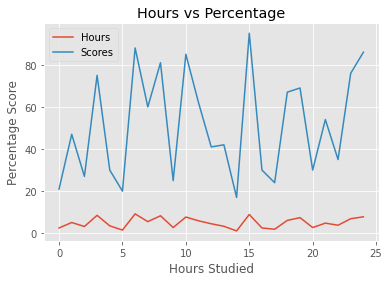

In [10]:
#Visualizing the Line Plot

plt.style.use('ggplot')
data.plot(kind='line')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

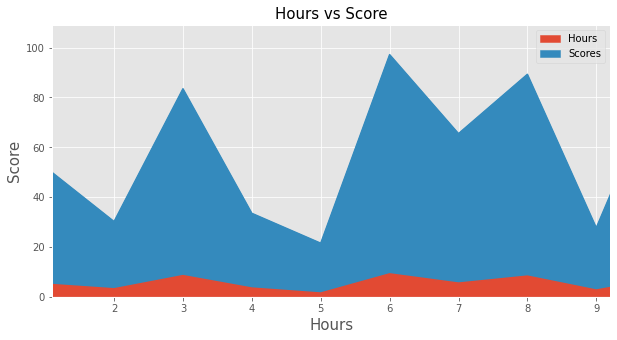

In [11]:
# Visualizing with Area Plot

xmin = min(data.Hours)
xmax = max(data.Hours)
data.plot(kind='area',alpha=1 ,stacked=True ,figsize=(10,5) ,xlim=(xmin,xmax))
plt.title('Hours vs Score' , size=15)
plt.xlabel('Hours',size=15)
plt.ylabel('Score',size=15)
plt.show()

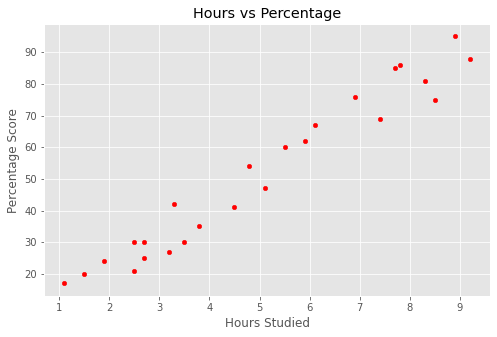

In [12]:
# Visualizing the Scatter Plot

data.plot(kind='scatter' ,x='Hours' ,y='Scores' ,color='r' ,figsize=(8,5))
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

#### By visualizing we can understand that we can solve this problem easily by Linear Regression

##**Modelling the Data**

In [13]:
x = np.asanyarray(data[{'Hours'}])
y = np.asanyarray(data['Scores'])

#using train test to split the data in train and test data
train_x ,test_x ,train_y ,test_y = train_test_split(x,y,test_size=0.2,random_state=2)

regressor = LinearRegression()
regressor.fit(train_x,train_y)

print('Training completion')
print('Coefficients: ',regressor.coef_)
print('Intercepts: ',regressor.intercept_)

Training completion
Coefficients:  [9.94061514]
Intercepts:  1.5079104828268939


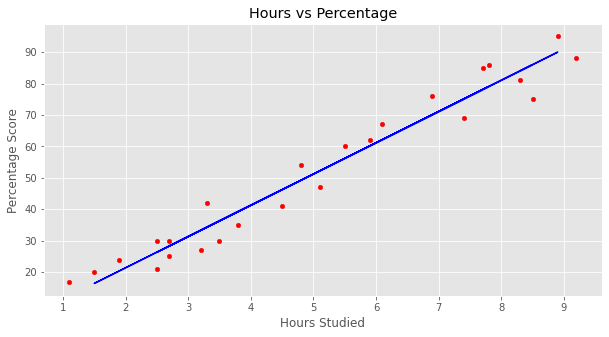

In [14]:
# We can also plot the fit line over the data in simple regression

data.plot(kind='scatter' ,x='Hours' ,y='Scores' ,figsize=(10,5) ,color='r')
plt.plot(train_x ,regressor.coef_[0]*train_x + regressor.intercept_ ,color='b')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show() 


#### The Blue line denotes that it's the best fit for this data

##**Evaluation of the Model**

In [15]:
# Using metrics to find mean absolute error and r2 to see the accuracy

from sklearn import metrics
from sklearn.metrics import r2_score

y_pred = regressor.predict(test_x)
print('Mean Absolute Error : {}'.format(metrics.mean_absolute_error(y_pred,test_y)))
print('r2-score: %.2f' % r2_score(y_pred ,test_y))

Mean Absolute Error : 4.877039354964476
r2-score: 0.98


Mean Absolute Error : It is mean of absolute value of errors

r2-score : It is not the error but it's the metric for accuracy of the model. Higher the r2 value higher is the accuracy of model. Best score is 1 !

In [16]:
# Comparing Actual vs Predicted

data2 = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})
data2  

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


##**Predicting the Score with the single input value**
>#### What will be predicted score if a student studies for 9.25 hrs/ day?

In [17]:
hours = 9.25
predicted_score = regressor.predict([[hours]])

print(f'No. of hours = {hours}')
print(f'Predicted Score = {predicted_score[0]}')

No. of hours = 9.25
Predicted Score = 93.45860055685799
